# Loan Prediction Model

I find this dataset interesting as a first project of the application in loans for retail banking. It is really powerful how the bank can automate base on deciding whether or not to issue a loan from Machine Learning. 

__Model:__ This model is to be able to predict whether a application of a loan is accepted or not, also known as a classification problem.

__Dataset:__ https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/

__Caveat:__ The dataset may contain missing values compared to the real world of retail banking. This may contain data for i.e. what the applicants and co-applicants monthly expenditure and spending habits are to be able to cover the loan etc. etc.

## Plan (WIP last Saved on 25/06/2019)

__Steps:__
- Step 1: Import data

- Step 2: Clean the data if required

- Step 3: Visualise the date

- Step 4: Regression Analysis

Interesting to see Education, and Property Area (Urban, Semi Urban, Rural)

What are the high weighted features that determine whether the loan is provided for this company - take an unbias approach that knows nothing about the industry.

## Import Data & Python Packages

In [1]:
#standard importing your libraries
import numpy as np
import pandas as pd
from numpy import array

In [2]:
# to make this notebook's output stable across runs
np.random.seed(42)

# To plot figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [3]:
train = pd.read_csv("TrainData-LoanPrediction.csv")

In [4]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Data Quality & Missing Value Assessment

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


__General Overview of the Dataset:__

There are 614 rows and 13 columns.
Data looks decent. All columns seems relevant at the moment.

The data is relatively clean, however I do see a few nulls, no irrelavant attributes like lender personal details (names, phone number, address) that is not relevant for this exercise.

I drop subset with nulls in 'LoanAmount','Dependents', 'Self_Employed', 'Loan_Amount_Term','Credit_History','Gender'

In [6]:
# check missing values in train dataset
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are missing terms in multiple features.
The highest is Credit_History with 50 missing terms.

## Credit History - Missing Values

In [7]:
#Propotion of "Credit_History" Missing
round(50/(len(train["Credit_History"])),4)

0.0814

Approx. 8% of entries for Credit_History are missing.

Let's see what this looks like in general.

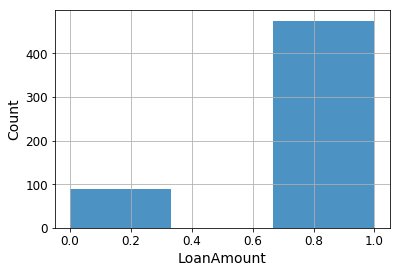

In [8]:
ax = train["Credit_History"].hist(bins=3, alpha = 0.8)
ax.set(xlabel='LoanAmount', ylabel='Count')
plt.show()

In [9]:
#This is to standardise the dataset to remove all nulls
train = train.dropna(subset = ['Gender','LoanAmount', 'Dependents', 'Self_Employed', 
                               'Loan_Amount_Term', 'Credit_History'])
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
Loan_ID              480 non-null object
Gender               480 non-null object
Married              480 non-null object
Dependents           480 non-null object
Education            480 non-null object
Self_Employed        480 non-null object
ApplicantIncome      480 non-null int64
CoapplicantIncome    480 non-null float64
LoanAmount           480 non-null float64
Loan_Amount_Term     480 non-null float64
Credit_History       480 non-null float64
Property_Area        480 non-null object
Loan_Status          480 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 52.5+ KB


For the time being I will drop these data set to be able to have a easier time playing with the data.

## Standardise - Apply 'one-hot-encoding', Apply to Train Data


In [10]:

#Transform the dataset: Gender, Married, Education, Self_Employed

train.Gender = train.Gender.map({"Male":1, "Female": 0})
train.Married = train.Married.map({"No":0, "Yes": 1})
train.Education = train.Education.map({"Not Graduate":0, "Graduate":1})
train.Self_Employed = train.Self_Employed.map({"No":0, "Yes": 1})
train.Property_Area = train.Property_Area.map({"Rural":1, "Semiurban":2, "Urban":3})
train.Loan_Status = train.Loan_Status.map({"N":0, "Y": 1})

#Will have to do the same for the Test Data to standardise


## Add Additional feature - Combined Income

In [11]:
#Added in feature of 'Combined_Income' as it would make sense for a relation with the"LoanAmount"

train['Combined_Income']=train["ApplicantIncome"]+train["CoapplicantIncome"]


## Set Train Data

In [12]:
df_final= train

## Set Test Data

Standardise the same data structure for the test data.

In [13]:
test = pd.read_csv("TestData-LoanPrediction.csv")

In [14]:
# check missing values in train dataset
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [15]:
#This is to standardise the dataset to remove all nulls
test = test.dropna(subset = ['Gender', 'Dependents', 'Self_Employed', 
                               'LoanAmount','Loan_Amount_Term', 'Credit_History'])

#Apply One-Hot Encoding
test.Gender = test.Gender.map({"Male":1, "Female": 0})
test.Married = test.Married.map({"No":0, "Yes": 1})
test.Education = test.Education.map({"Not Graduate":0, "Graduate":1})
test.Self_Employed = test.Self_Employed.map({"No":0, "Yes": 1})
test.Property_Area = test.Property_Area.map({"Rural":1, "Semiurban":2, "Urban":3})

#Apply Extra Feature of 'Combined_Income'
test['Combined_Income']=test["ApplicantIncome"]+test["CoapplicantIncome"]

#Notice did Loan_status is not applied as it is the result we are trying to predict

# Exploratory Data Analysis

In [16]:
#Describe is a Panda function that is really useful to give a feel of a data set especially for large dataset
train.describe()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Combined_Income
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,0.820833,0.647917,0.797917,0.137500,5364.231250,1581.093583,144.735417,342.050000,0.854167,2.022917,0.691667,6945.324833
std,0.383892,0.478118,0.401973,0.344734,5668.251251,2617.692267,80.508164,65.212401,0.353307,0.776411,0.462287,5969.948374
min,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,36.000000,0.000000,1.000000,0.000000,1442.000000
25%,1.000000,0.000000,1.000000,0.000000,2898.750000,0.000000,100.000000,360.000000,1.000000,1.000000,0.000000,4148.000000
50%,1.000000,1.000000,1.000000,0.000000,3859.000000,1084.500000,128.000000,360.000000,1.000000,2.000000,1.000000,5422.500000
75%,1.000000,1.000000,1.000000,0.000000,5852.500000,2253.250000,170.000000,360.000000,1.000000,3.000000,1.000000,7672.500000
max,1.000000,1.000000,1.000000,1.000000,81000.000000,33837.000000,600.000000,480.000000,1.000000,3.000000,1.000000,81000.000000


mean loan term is about 342 months - and a sd of 65 (quite standard)
loan amount is about 144k - sd of 80k
Income varies quite a bit the sd is quite varied

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x120a9e668>,
      dtype=object)

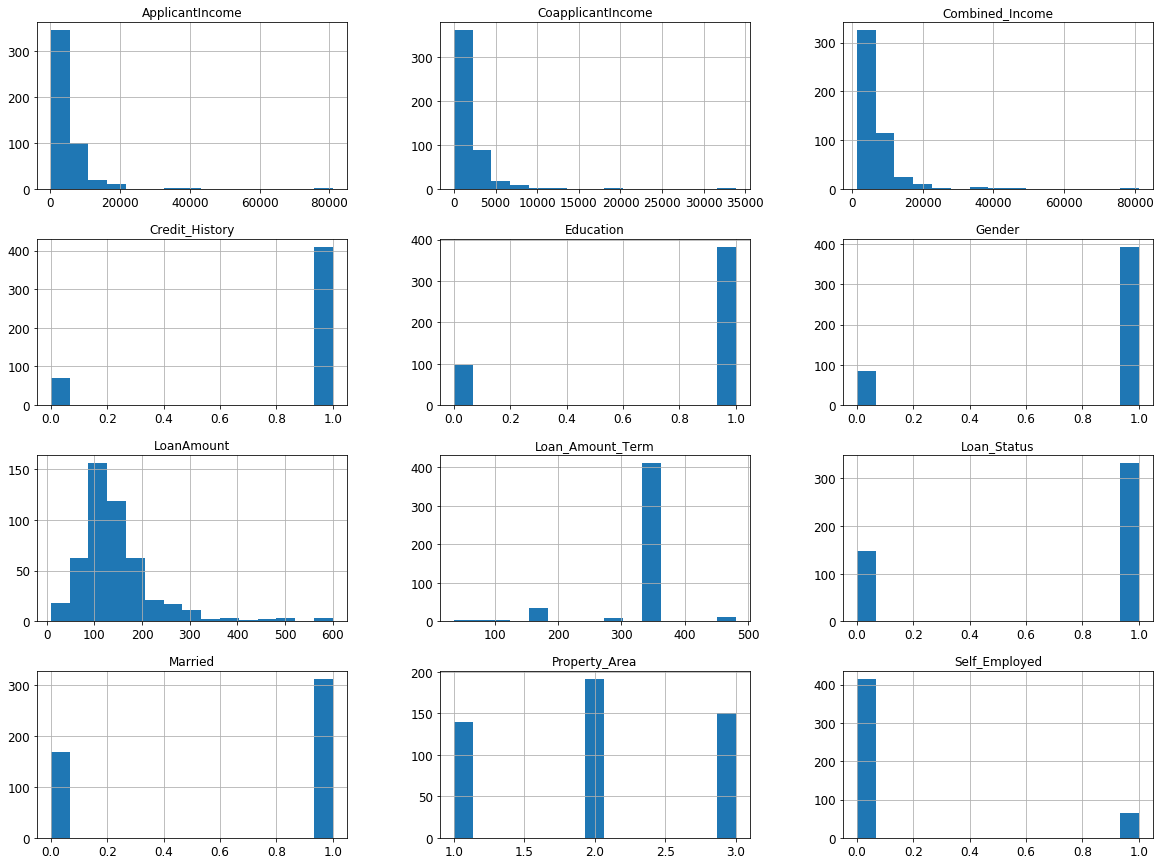

In [17]:
%matplotlib inline 
import matplotlib.pyplot as plt
train.hist(bins=15, figsize=(20,15)) 

Alter this!

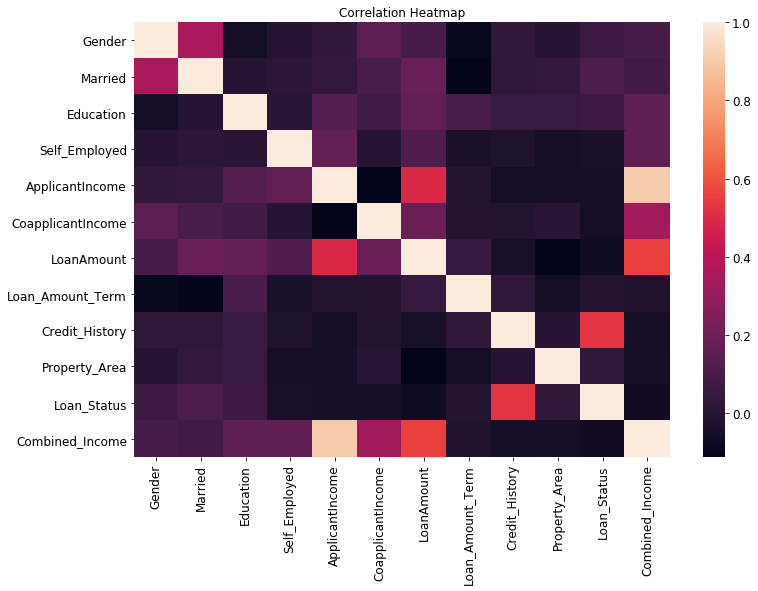

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.subplots(figsize=(12,8))
ax = plt.axes()
ax.set_title("Correlation Heatmap")
corr = train.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

#Most terms here are positvely correlated. For user visual purpose have maintained 0 to 1 to represent correlations

## Exploration of Applicant(s) Income

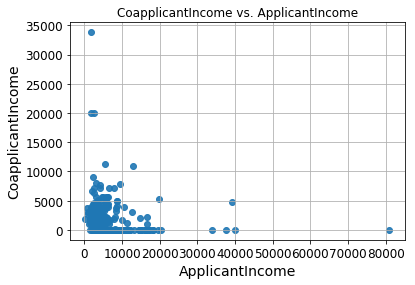

In [19]:
# Scatter plot
import matplotlib.pyplot as plt

plt.scatter(train["ApplicantIncome"], train["CoapplicantIncome"], alpha = 0.9)

plt.xlabel('ApplicantIncome')
plt.ylabel('CoapplicantIncome')
plt.title('CoapplicantIncome vs. ApplicantIncome')

plt.grid(True)

# Show the plot
plt.show()

There are a few outliers where the Applicant earns signifcantly more than the Co-Applicant and also the vice-versa Scneario.

## Exploration of Loan Amount

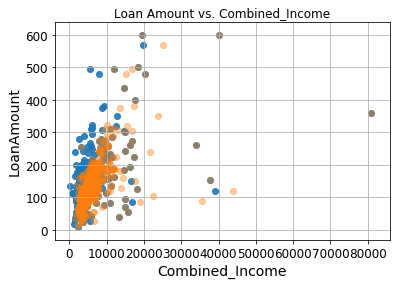

In [20]:
# Scatter plot Loan Amount vs. Income
plt.scatter(train["ApplicantIncome"], train["LoanAmount"], alpha = 0.9)

plt.xlabel('ApplicantIncome')
plt.ylabel('LoanAmount')
plt.title('Loan Amount vs. ApplicantIncome')

plt.scatter(train["Combined_Income"], train["LoanAmount"], alpha =0.4)

plt.xlabel('Combined_Income')
plt.ylabel('LoanAmount')
plt.title('Loan Amount vs. Combined_Income')

plt.grid(True)
# Show the plot
plt.show()

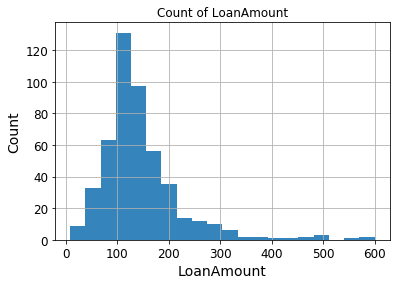

In [21]:
# Scatter plot

plt.hist(train["LoanAmount"], bins=20, alpha = 0.9)

plt.xlabel('LoanAmount')
plt.ylabel('Count')
plt.title('Count of LoanAmount')

plt.grid(True)

# Show the plot
plt.show()

## Exploration of Applicant's Background

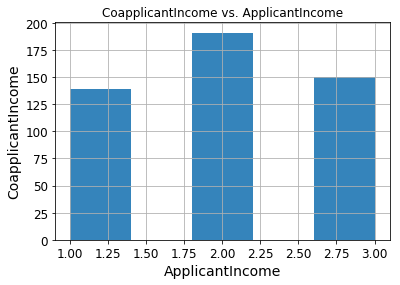

In [22]:
# Scatter plot
import matplotlib.pyplot as plt

plt.hist(train["Property_Area"], bins = 5, alpha =0.9)

plt.xlabel('ApplicantIncome')
plt.ylabel('CoapplicantIncome')
plt.title('CoapplicantIncome vs. ApplicantIncome')

#Change Axis


plt.grid(True)

# Show the plot
plt.show()

In [23]:
#Check out how much Male Income and Female Income assuming if Female then Male. Scatter plot


# Logisitc Regression and Results

In [24]:
df_final.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Combined_Income
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,1,0,6091.0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,3,1,3000.0
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,3,1,4941.0
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,3,1,6000.0
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,3,1,9613.0


In [25]:
cols=[ "LoanAmount", "Loan_Amount_Term", 
      "Credit_History", "Combined_Income"]

#cols=["Education", "Self_Employed", "ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term", "Credit_History", "Property_Area", "Combined_Income"]

X=df_final[cols]
Y=df_final['Loan_Status']

In [26]:
import statsmodels.api as sm
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
logit_model=sm.Logit(Y,X)
result=logit_model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.485301
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            Loan_Status   No. Observations:                  480
Model:                          Logit   Df Residuals:                      476
Method:                           MLE   Df Model:                            3
Date:                Thu, 27 Jun 2019   Pseudo R-squ.:                  0.2144
Time:                        23:59:25   Log-Likelihood:                -232.94
converged:                       True   LL-Null:                       -296.53
                                        LLR p-value:                 2.212e-27
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
LoanAmount          -0.0019      0.002     -1.156      0.248      -0.005       0.001
Loan_Amount

Currently WIP:
__For Reference:__
https://www.kaggle.com/sgus1318/titanic-analysis-learning-to-swim-with-python
